<h1>Logistic Regression using maximum likelihood estimator</h1>

log loss error = - (1/n) &Sigma;[ yi*log(yi^) + (1-yi)*log(1-yi^) ]
<br>
(Binary cross entropy)

&sigma;'(x) = &sigma;(x) ( 1 - &sigma;(x) )

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=100 , n_features=2 , n_informative=1 , n_redundant=0 , n_classes=2 , n_clusters_per_class=1 , random_state=41 , hypercube=False , class_sep=30)

In [3]:
import matplotlib.pyplot as plt

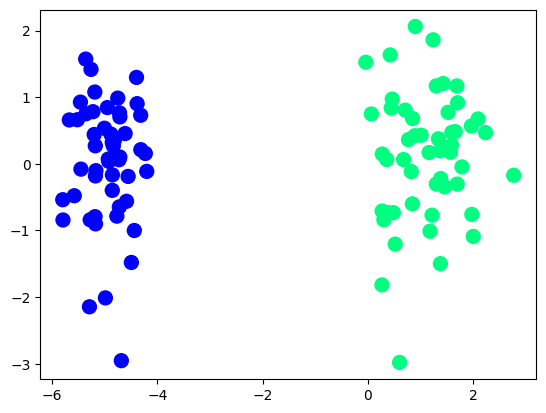

In [4]:
plt.scatter(X[:,0] , X[:,1] , c=Y , cmap='winter' , s=100)

In [7]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None , solver='sag')
lor.fit(X,Y)

c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [8]:
lor.coef_ , lor.intercept_

(array([[4.17519451, 0.18676284]]), array([4.0876195]))

In [19]:
m1 = -lor.coef_[0][0] / lor.coef_[0][1]
b1 = - lor.intercept_/ lor.coef_[0][1]

In [20]:
x_input = np.linspace(-3 , 3 , 1000)
y_input = m1*x_input + b1

In [21]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [34]:
def GDLogistic(X,Y):

    X = np.insert(X , 0 , 1 , axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(10000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*( np.dot((Y-y_hat),X) / X.shape[0] )

    return weights[1:] , weights[0]

In [35]:
coef , intercept = GDLogistic(X,Y)

In [36]:
coef , intercept

(array([3.72742137, 0.15007352]), np.float64(5.700575226218901))

In [37]:
m = -coef[0] / coef[1]
b = - intercept/ coef[1]

In [38]:
x_input1 = np.linspace(-3 , 3 , 1000)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

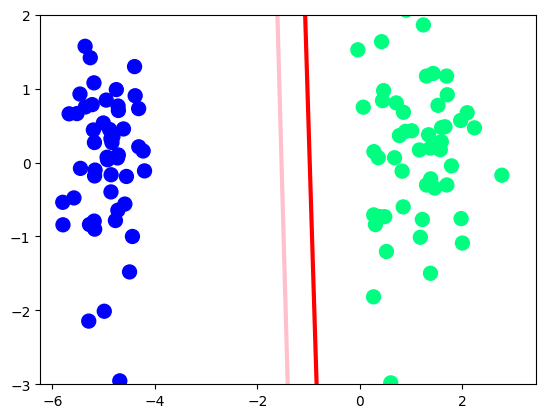

In [39]:
plt.plot(x_input , y_input , color='red' , linewidth=3)
plt.plot(x_input1 , y_input1 , color='pink' , linewidth=3)
plt.scatter(X[:,0] , X[:,1] , c=Y , cmap='winter' , s=100)
plt.ylim(-3,2)